In [31]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf


In [3]:
# pass the wassertein distance to softmax function

wass = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/weights/wass_arr.npy')

In [4]:
wass.shape # rcm x month x lon x lat x 1


(5, 12, 90, 40, 1)

In [8]:
# for each lat, lon and month choose the rcm with the smallest wass distance
# plot with xarray for lat and lon

wass_min = np.min(wass, axis=0) # month x lon x lat x 1 

# also locate the index of the minimum wass distance
wass_min_idx = np.argmin(wass, axis=0) # month x lon x lat x 1

wass_min_idx

# plot the 


(12, 90, 40, 1)

In [10]:
wass_min_idx.squeeze().shape

(12, 90, 40)

In [36]:
# convert the np.array to xarray


wass_min_xr = xr.DataArray(wass_min_idx.squeeze(), dims=['month', 'lon', 'lat'], coords=[np.arange(1,13), np.arange(60, 105, 0.5), np.arange(20, 40, 0.5)])

In [37]:
wass_min_xr

<xarray.DataArray (month: 12, lon: 90, lat: 40)>
array([[[4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        ...,
        [4, 4, 4, ..., 3, 3, 3],
        [1, 4, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3]],

       [[4, 4, 4, ..., 3, 4, 3],
        [4, 4, 4, ..., 4, 4, 3],
        [4, 4, 4, ..., 3, 3, 3],
        ...,
        [0, 0, 4, ..., 3, 3, 3],
        [0, 4, 0, ..., 3, 3, 3],
        [0, 1, 1, ..., 3, 3, 3]],

       [[1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        ...,
...
        ...,
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3]],

       [[4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3]],

       [[4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        ...,
        [1, 0, 0, ..., 3, 3, 3],
        [1, 1, 0, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3]]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 60.0 60.5 61.0 61.5 62.0 ... 103.0 103.5 104.0 104.5
  * lat      (lat) float64 20.0 20.5 21.0 21.5 22.0 ... 37.5 38.0 38.5 39.0 39.5

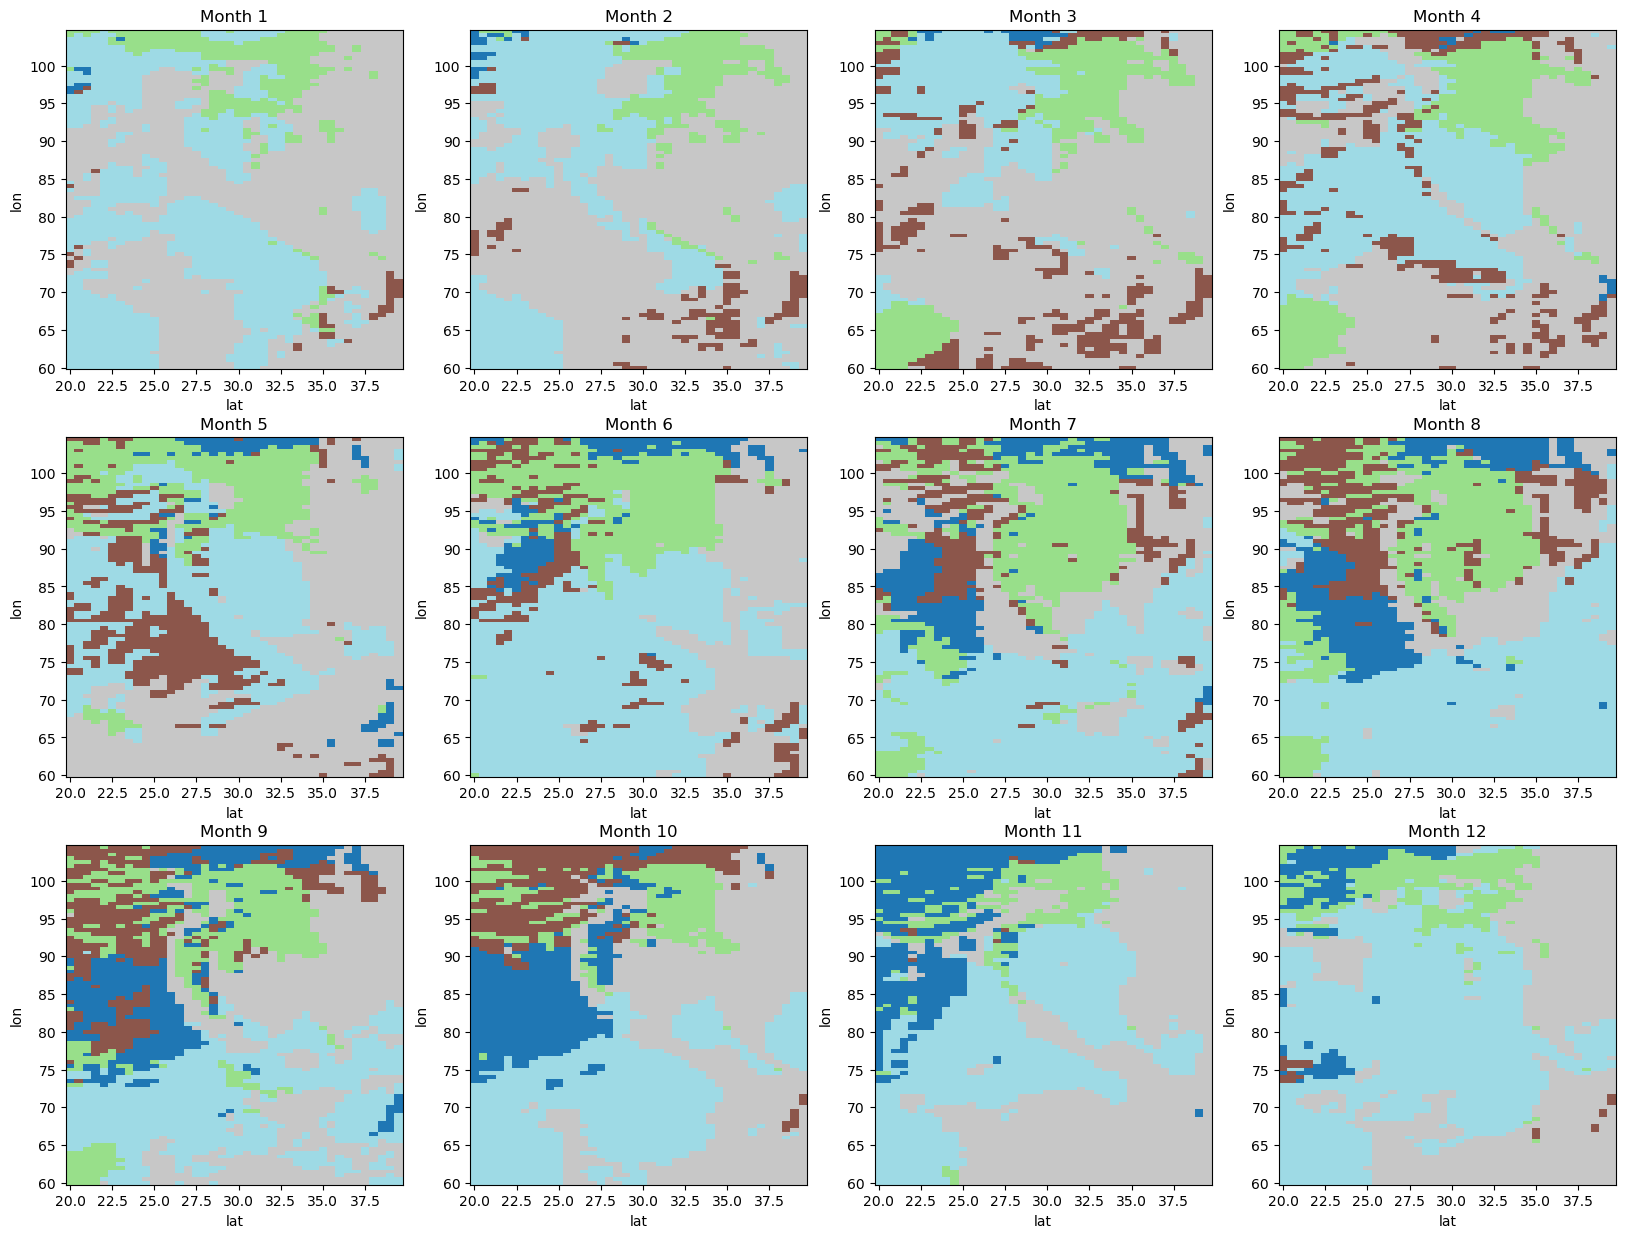

In [38]:
# For each month, plot make a plot where the color of each lat lon is the rcm with the smallest wass distance

fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for i in range(12):
    wass_min_xr.sel(month=i+1).plot(ax=ax[i//4, i%4], cmap='tab20', add_colorbar=False)
    ax[i//4, i%4].set_title(f'Month {i+1}')

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_10291/1958685386.py:6: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


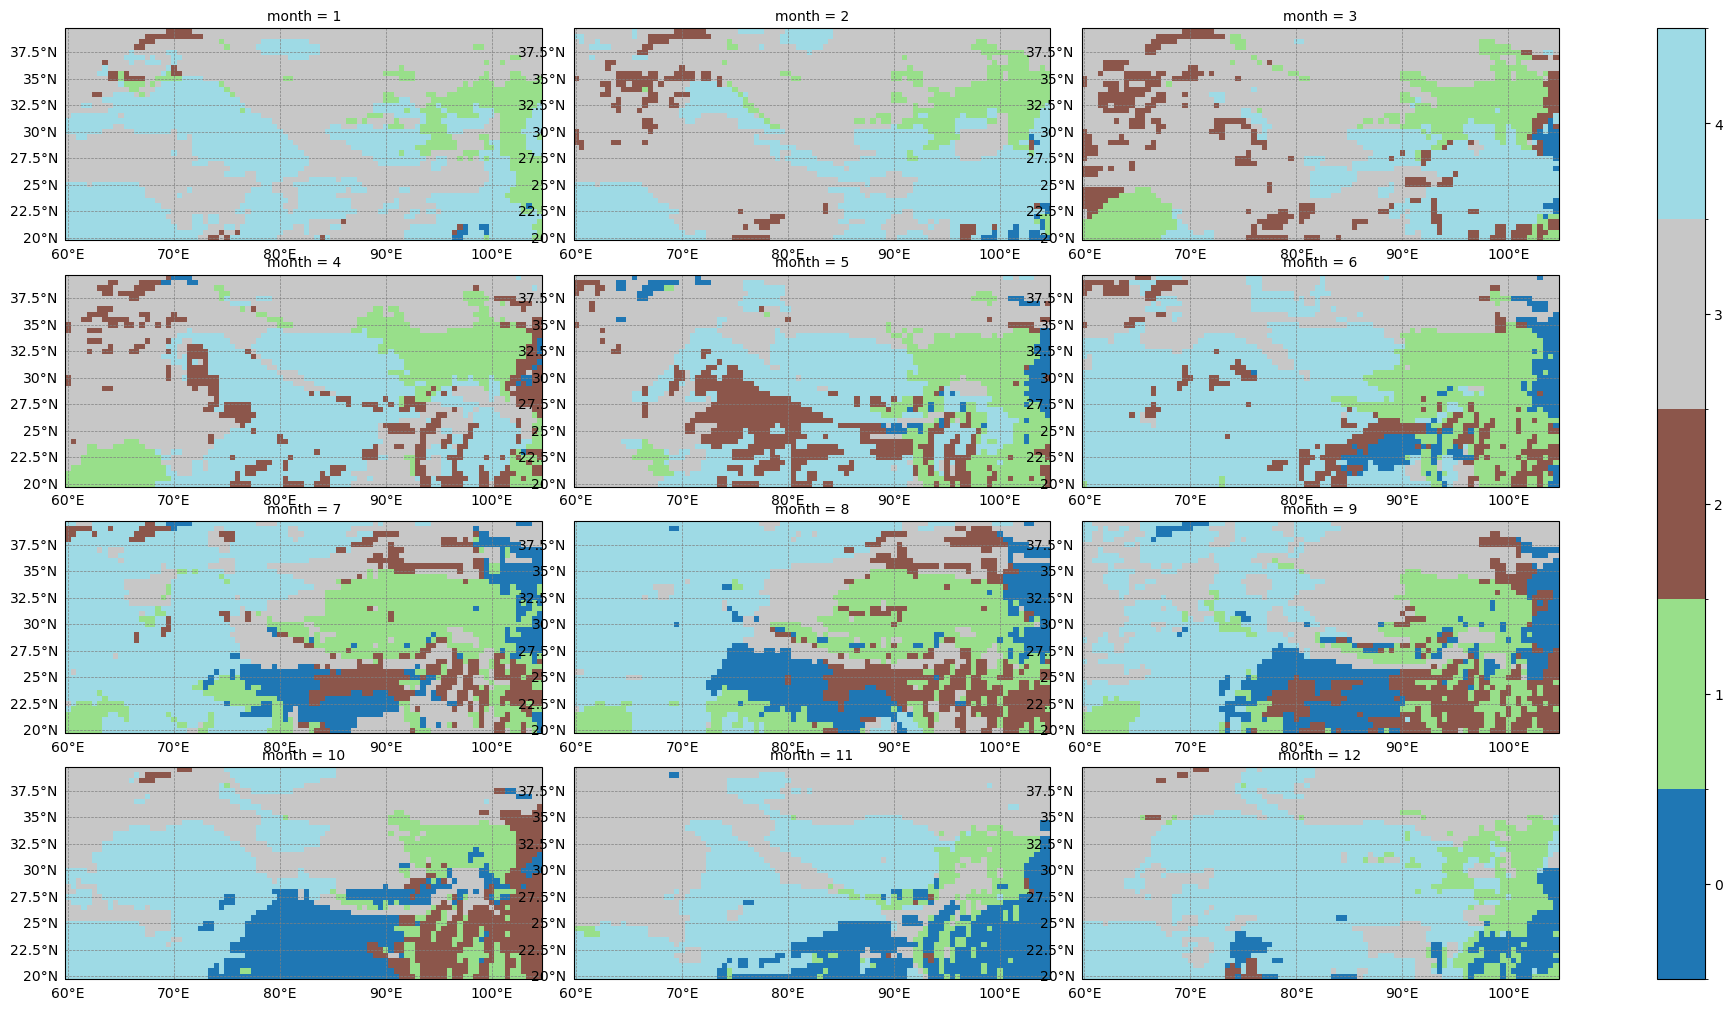

In [39]:
# I set where the ticks are on the colorbar 
proj = ccrs.PlateCarree()
p = wass_min_xr.plot(x='lon', y='lat', col='month', col_wrap=3, levels=6, vmin = -0.5, vmax=4.5, cmap='tab20', figsize=(20, 10),
                 cbar_kwargs={'ticks': np.arange(0, 5, 1)}, subplot_kws={'projection': proj})

for ax in p.axes.flat:
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
